<h1>Sweta Barnwal</h1>

<h1>The Spark Foundation || GRIP NOV20 || TASK-2</h1>

<h1>Prediction using Unsupervised ML</h1>

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x = pd.DataFrame(iris.data, columns=['Sepal Length(cm)', 'Sepal Width(cm)','Petal Length(cm)', 'Petal Width(cm)'])
y = pd.DataFrame(iris.target, columns=['Target'])
data = pd.concat([x,y], axis=1)
data

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<h2>K-means classification</h2>

In [7]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [9]:
print(wcss)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.25600931571815, 46.44618205128204, 39.03998724608725, 34.299712121212146, 30.014398496240617, 28.03690635345049, 26.534529220779234]


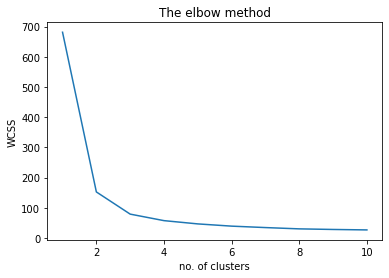

In [10]:
#line graph, 

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS') 
plt.show()

In [13]:
x = data.iloc[:,[0,1,2,3]].values
x.shape

(150, 4)

In [15]:
kmeans = KMeans(n_clusters = 3)
model = kmeans.fit_predict(x)
model

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
centers = kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

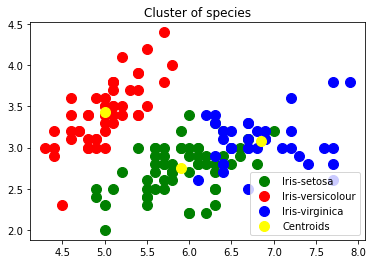

In [28]:
# Visualising the clusters - On the first two columns
plt.scatter(x[model == 0, 0], x[model == 0, 1],s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[model == 1, 0], x[model == 1, 1],s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[model == 2, 0], x[model == 2, 1],s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("Cluster of species")
plt.legend()
plt.show()

<h2>Prediction</h2>

In [23]:
pred = np.choose(kmeans.labels_, [0, 1, 2]).astype(np.int64)

In [24]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [25]:
import sklearn.metrics as metrics
metrics.accuracy_score(pred, y)

0.24

In [26]:
metrics.confusion_matrix(pred, y['Target'])

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

<h2>Thank you!!</h2>